In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Exploring & visualization of the dataset

In [54]:
nyc_data = pd.read_csv("../data/AB_NYC_2019.csv")
print(nyc_data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [55]:
#to print the shape of the data
nyc_data.shape

(48895, 16)

In [56]:
# Get column names
nyc_data_column_names = nyc_data.columns
print(nyc_data_column_names)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [57]:
# Get column data types
print(nyc_data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [58]:
# Convert last_review column to datetime object
nyc_data['last_review'] =  pd.to_datetime(nyc_data['last_review'])

In [59]:
# Numerical Columns
nyc_data_num = nyc_data._get_numeric_data().columns

# Categorical Columns
nyc_data_cat = set(nyc_data.columns)-set(nyc_data_num) 

print(nyc_data_num)

print(nyc_data_cat)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')
{'name', 'host_name', 'neighbourhood_group', 'last_review', 'neighbourhood', 'room_type'}


### To check missing values

In [60]:
print("\n Non missing values")
print(nyc_data.count())
num_rows = nyc_data.shape[0]
num_missing = num_rows-nyc_data.count()

print("\nMissing Values")
print(num_missing)



 Non missing values
id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

Missing Values
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                     

### to check unique value columns 

In [61]:
for i in nyc_data_column_names:
    print('{} is unique: {}'.format(i, nyc_data[i].is_unique))

id is unique: True
name is unique: False
host_id is unique: False
host_name is unique: False
neighbourhood_group is unique: False
neighbourhood is unique: False
latitude is unique: False
longitude is unique: False
room_type is unique: False
price is unique: False
minimum_nights is unique: False
number_of_reviews is unique: False
last_review is unique: False
reviews_per_month is unique: False
calculated_host_listings_count is unique: False
availability_365 is unique: False


### 'id' column is unique

In [62]:
#checking for duplicates
nyc_dup_col = nyc_data.drop_duplicates()
print(nyc_dup_col.shape)

(48895, 16)


## To fill Missing Values 

In [63]:
## Filling name and host name columns 
nyc_data['name'].fillna("$",inplace=True)
nyc_data['host_name'].fillna("#",inplace=True)
#filling the null values in reviews per month with the average
nyc_data.reviews_per_month = nyc_data.reviews_per_month.fillna(0)

 review_per_month column is filled with 0 value and name and host_name columns with special characters

In [64]:
# Filling last_review with earliest date
earliest_review = min(nyc_data['last_review'])
print(earliest_review)
nyc_data['last_review'] = nyc_data['last_review'].fillna(earliest_review)

2011-03-28 00:00:00


to make sure there is no null value in the dataset

In [65]:
nyc_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### To find the Correlations between the columns 

<AxesSubplot:xlabel='price', ylabel='Density'>

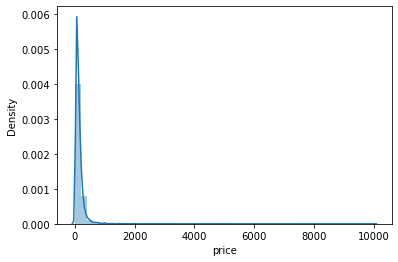

In [66]:
nyc_data_cleaned = nyc_data.copy()
sns.distplot(nyc_data_cleaned['price'])

### price column is highly sqewed, so we normally distribute the column using log

<AxesSubplot:xlabel='price', ylabel='Density'>

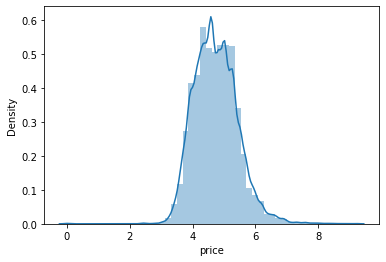

In [67]:
sns.distplot(np.log1p(nyc_data_cleaned['price']))

### price column normally distributed

In [68]:
nyc_data_cleaned['price'] = np.log1p(nyc_data_cleaned['price'])

### To see what columns influence the price prediction

In [69]:
for i in nyc_data_column_names:
    print('{} is unique: {}'.format(i, nyc_data[i].is_unique))
nyc_data_cleaned.shape

id is unique: True
name is unique: False
host_id is unique: False
host_name is unique: False
neighbourhood_group is unique: False
neighbourhood is unique: False
latitude is unique: False
longitude is unique: False
room_type is unique: False
price is unique: False
minimum_nights is unique: False
number_of_reviews is unique: False
last_review is unique: False
reviews_per_month is unique: False
calculated_host_listings_count is unique: False
availability_365 is unique: False


(48895, 16)

#### Only the id value is unique . 48895 different values are not helpful predicting the price. The column should be dropped. 

In [70]:
nyc_data_cleaned = nyc_data_cleaned.drop(['id'], axis=1)


### To visualize the number of bookings according to neighbourhood group. 


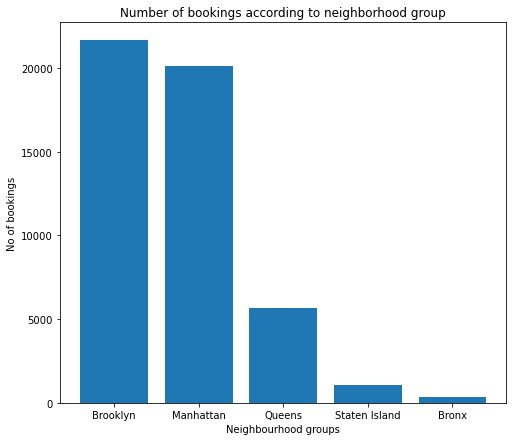

In [71]:
%matplotlib inline

nyc_neighbourhood_group = nyc_data_cleaned['neighbourhood_group'].value_counts()
count = nyc_data_cleaned.neighbourhood_group.unique()
plt.figure(figsize=(8,7))
plt.bar(count, nyc_neighbourhood_group)
plt.xlabel('Neighbourhood groups', fontsize=10)
plt.ylabel('No of bookings', fontsize=10)
plt.title('Number of bookings according to neighborhood group')
plt.show()

### To visualize the bookings made according to neighbourhood_group with latitude and longitude using a scatter plot:

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

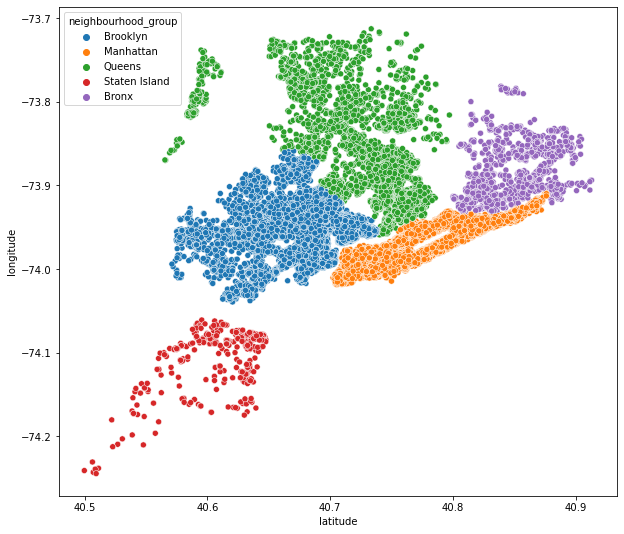

In [72]:
plt.figure(figsize=(10,9))
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group",data = nyc_data_cleaned)

#### Both the neighbourhood and neigbourhood groups are important for our analysis and price prediction according to the plot.
#### the latitude and longitude are also important columns as they relate to neighbourhood group
#### Bookings are mostly done in the neighbourhood of Brooklyn and Manhatten. Staten Island and Bronx have fewer bookings.


### Visualization for room type and price 

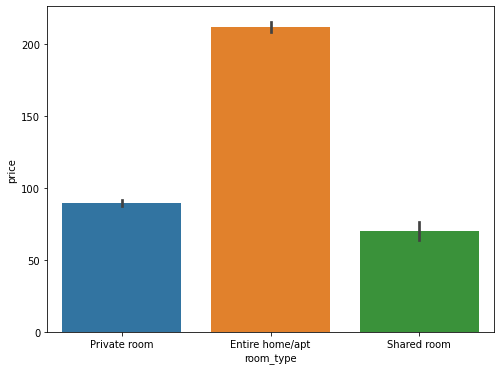

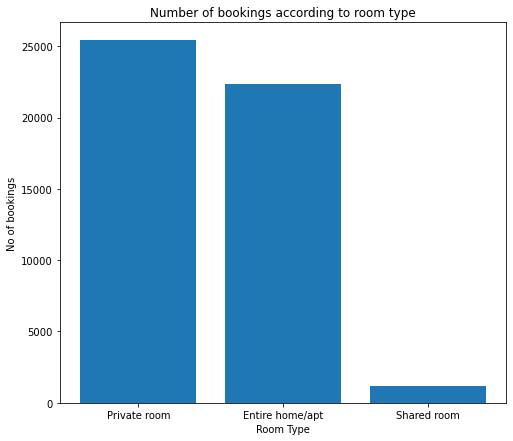

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(x="room_type", y="price", data=nyc_data);
plt.show()

nyc_room_type = nyc_data_cleaned['room_type'].value_counts()
count = nyc_data_cleaned.room_type.unique()
plt.figure(figsize=(8,7))
plt.bar(count, nyc_room_type)
plt.xlabel('Room Type', fontsize=10)
plt.ylabel('No of bookings', fontsize=10)
plt.title('Number of bookings according to room type')
plt.show()

### Price variation for private room and shared room is almost similar. But, the price for Entire home/apt room_type is very high.


Text(0.5, 0, 'Price')

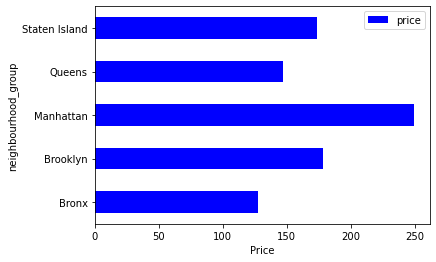

In [74]:
df1 = nyc_data[nyc_data.room_type == "Entire home/apt"][["neighbourhood_group","price"]]

d = df1.groupby("neighbourhood_group").mean()
d.plot(kind='barh', color='blue')
plt.xlabel('Price', fontsize=10)


In [75]:
data = nyc_data_cleaned.groupby(['neighbourhood_group'])['number_of_reviews'].sum()
data

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

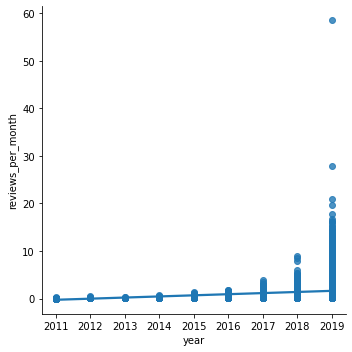

In [76]:
nyc_data_1 = nyc_data_cleaned.copy()
nyc_data_1["day"] = nyc_data_1['last_review'].map(lambda x: x.day)
nyc_data_1["month"] = nyc_data_1['last_review'].map(lambda x: x.month)
nyc_data_1["year"] = nyc_data_1['last_review'].map(lambda x: x.year)

sns.lmplot(x='year', y='reviews_per_month', data=nyc_data_1)


### We can see that there is no strong correlation among the columns except for 2 columns
We observe that number of reviews and reviews_per_month are correlated

Price and longitude are negatively correlated which means that when place is far from city, people do not prefer.
In our neighbourhood_group, we see that trend for areas with less bookings like Staten Island and Bronx


In [77]:
nyc_data_cleaned.to_csv("../data/nyc_data_cleaned.csv",index = False)